In [1]:
import pandas as pd
data=pd.read_csv("/content/science.csv")
print(data)

      rownames State  PrivPub  school  class sex  like  Class
0            1   ACT   public       1      1   f     8    1.1
1            2   ACT   public       1      1   f     6    1.1
2            3   ACT   public       1      1   f     5    1.1
3            4   ACT   public       1      1   f     2    1.1
4            6   ACT   public       1      1   f     5    1.1
...        ...   ...      ...     ...    ...  ..   ...    ...
1380      1540   NSW  private      41      2   m     3   41.2
1381      1541   NSW  private      41      2   m     7   41.2
1382      1542   NSW  private      41      2   m     6   41.2
1383      1543   NSW  private      41      2   m     2   41.2
1384      1544   NSW  private      41      2   m     6   41.2

[1385 rows x 8 columns]


In [2]:
data.isna().sum()

rownames    0
State       0
PrivPub     0
school      0
class       0
sex         2
like        0
Class       0
dtype: int64

In [4]:
data["sex"]=data["sex"].fillna("0")
print(data)

      rownames State  PrivPub  school  class sex  like  Class
0            1   ACT   public       1      1   f     8    1.1
1            2   ACT   public       1      1   f     6    1.1
2            3   ACT   public       1      1   f     5    1.1
3            4   ACT   public       1      1   f     2    1.1
4            6   ACT   public       1      1   f     5    1.1
...        ...   ...      ...     ...    ...  ..   ...    ...
1380      1540   NSW  private      41      2   m     3   41.2
1381      1541   NSW  private      41      2   m     7   41.2
1382      1542   NSW  private      41      2   m     6   41.2
1383      1543   NSW  private      41      2   m     2   41.2
1384      1544   NSW  private      41      2   m     6   41.2

[1385 rows x 8 columns]


In [8]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["State"] = b.fit_transform(data["State"])
data["PrivPub"]=b.fit_transform(data["PrivPub"])
data["sex"]=b.fit_transform(data["sex"])
print(data)

      rownames  State  PrivPub  school  class  sex  like  Class
0            1      0        1       1      1    1     8    1.1
1            2      0        1       1      1    1     6    1.1
2            3      0        1       1      1    1     5    1.1
3            4      0        1       1      1    1     2    1.1
4            6      0        1       1      1    1     5    1.1
...        ...    ...      ...     ...    ...  ...   ...    ...
1380      1540      1        0      41      2    2     3   41.2
1381      1541      1        0      41      2    2     7   41.2
1382      1542      1        0      41      2    2     6   41.2
1383      1543      1        0      41      2    2     2   41.2
1384      1544      1        0      41      2    2     6   41.2

[1385 rows x 8 columns]


In [9]:
x=data.drop("Class",axis=1)
y=data["Class"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

      rownames  State  PrivPub  school  class  sex  like
778        860      0        0      23      3    2     1
695        763      0        1      21      1    2     1
1274      1421      0        0      36      4    2     4
101        108      0        1       3      2    1     3
656        722      0        1      20      2    1     7
...        ...    ...      ...     ...    ...  ...   ...
1358      1517      1        0      41      1    2     6
658        724      0        1      20      2    1     4
439        483      0        1      16      1    1     5
185        200      0        1       6      2    1     6
1217      1352      0        0      36      2    1     7

[1357 rows x 7 columns]
778     23.3
695     21.1
1274    36.4
101      3.2
656     20.2
        ... 
1358    41.1
658     20.2
439     16.1
185      6.2
1217    36.2
Name: Class, Length: 1357, dtype: float64


In [13]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [16]:
c=br.predict([[1545,0,1,41,1,0,6]])
print(c)

[41.1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


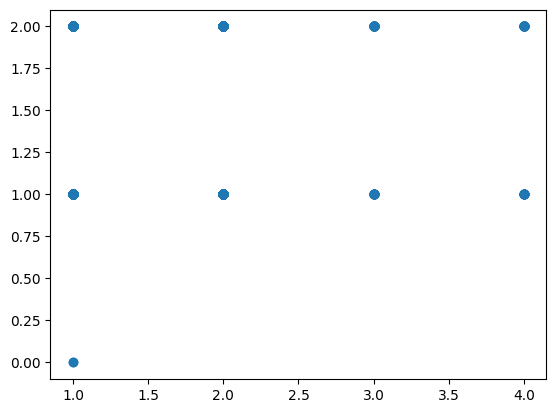

In [17]:
from matplotlib import pyplot as plt
plt.scatter(data["class"],data["sex"])
plt.show()